In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import toolz as tz
import os 
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py

Mounted at /content/drive


In [2]:
print(os.getcwd())
print(os.getcwd())
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets/Solar")
os.chdir("/content/drive/MyDrive/solar_data/")
files_dir = "/content/drive/MyDrive/solar_data/"
filename1 = files_dir + "Plant_1_Generation_Data.csv"
print(filename1)
print(os.getcwd())
filename2 = files_dir + "Plant_2_Generation_Data.csv"
filename3 = files_dir + "Plant_1_Weather_Sensor_Data.csv"
filename4 = files_dir + "Plant_2_Weather_Sensor_Data.csv"

/content
/content
/content/drive/MyDrive/solar_data/Plant_1_Generation_Data.csv
/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data


In [3]:
df_plant1 = pd.read_csv(filename1, parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant2 = pd.read_csv(filename2,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df_weather1 = pd.read_csv(filename3,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather2 = pd.read_csv(filename4,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather12 = pd.concat([df_weather1,df_weather2],axis=0)
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 352.2+ KB


In [5]:
timeinfoplant1 = df_plant1['DATE_TIME'].dt.time
dateinfoplant1= df_plant1['DATE_TIME'].dt.date

timeinfoplant2 = df_plant2['DATE_TIME'].dt.time
dateinfoplant2= df_plant2['DATE_TIME'].dt.date

#df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values)
df_plant1['TIME'] = timeinfoplant1
#df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values)
df_plant2['TIME'] = timeinfoplant2
df_plant1
pd.to_datetime(df_plant1['DATE'])
pd.to_datetime(df_plant2['DATE'])
df_plant12= pd.concat([df_plant1,df_plant2],axis = 0)
pd.to_datetime(df_plant12['DATE_TIME'])
df_plant12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
 7   DATE         136476 non-null  datetime64[ns]
 8   TIME         136476 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 10.4+ MB


In [6]:
pd.to_datetime(df_weather12['DATE_TIME'])
timeinfoweather12 = df_weather12['DATE_TIME'].dt.time
dateinfoweather12= df_weather12['DATE_TIME'].dt.date
df_weather12['DATE'] = pd.to_datetime(dateinfoweather12.values)
df_weather12['TIME'] = timeinfoweather12
pd.to_datetime(df_weather12['DATE'])
pd.to_datetime(df_weather12['DATE_TIME'])
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
 6   DATE                 6441 non-null   datetime64[ns]
 7   TIME                 6441 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 452.9+ KB


In [7]:
result12 = pd.merge(df_plant12,df_weather12, how ="left", on=["DATE","TIME","PLANT_ID"])
result12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

# 0. Prior to QuAM Building:

In [8]:
df_dt_clean = result12.copy()
temp = df_dt_clean.groupby(['TIME','SOURCE_KEY_x']).agg({'DC_POWER':'mean', 'AC_POWER':'sum','IRRADIATION':'mean'}).reset_index() 

In [9]:
dt_classification = temp
dt_classification['Performance'] =''
dt_classification["Performance"].astype("category")
dt_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME          4224 non-null   object 
 1   SOURCE_KEY_x  4224 non-null   object 
 2   DC_POWER      4224 non-null   float64
 3   AC_POWER      4224 non-null   float64
 4   IRRADIATION   4224 non-null   float64
 5   Performance   4224 non-null   object 
dtypes: float64(3), object(3)
memory usage: 198.1+ KB


In [ ]:
#ac_power_gte_308 = result12_clean["AC_POWER"] >= 308

#irradiation_gte_010 = result12_clean["IRRADIATION"] >= 0.10 

#ac_power_gte_308_irrad_gte_010 = np.logical_and(ac_power_gte_308, irradiation_gte_010) 

#plant1_performance_above_average = np.logical_and(ac_power_gte_308_irrad_gte_010, plant1) 

#result12_clean.loc[plant1_performance_above_average, "Performance"] = "Above Average"

In [10]:
for i, row in dt_classification.iterrows():
    if(row['DC_POWER'] >=	1654 ):
       dt_classification.loc[i,'Performance']='Above Average'
    if(row['DC_POWER'] < 	1654 ):
       dt_classification.loc[i,'Performance']='Below Average'
    if(row['DC_POWER'] < 821 and row['IRRADIATION'] >=0.4 ):
       dt_classification.loc[i,'Performance']='Maintenance Required'    
    if(row['DC_POWER'] == 0 and row['IRRADIATION'] <0.07 ):
       dt_classification.loc[i,'Performance']='Normal'  

In [11]:
features = ['TIME', 'DC_POWER', 'IRRADIATION']
fig = px.scatter_matrix(dt_classification)

fig.update_layout(width=len(features) * 200,
                 height=len(features) * 200,
                 margin=dict(l=0, r=0, t=0, b=0))

fig.show()


In [12]:
dt_classification['SourceKeyCode'] = dt_classification['SOURCE_KEY_x'].map({'1BY6WEcLGh8j5v7': '01', '7JYdWkrLSPkdwr4': '02', 'WRmjgnKYAwPKWDb': '03', \
                                                                      'adLQvlD726eNBSB': '04', 'ih0vzX44oOqAx2f': '05', 'sjndEbLyjtCKgGv': '06', \
                                                                      'z9Y9gH1T5YWrNuG': '07', 'YxYtjZvoooNbGkE': '08', '9kRcWv60rDACzjR': '09', \
                                                                      'LYwnQax7tkwH5Cb': '10', 'NgDl19wMapZy17u': '11', 'Quc1TzYxW2pYoWX': '12', \
                                                                      'mqwcsP2rE7J0TFp': '13', 'q49J1IKaHRwDQnt': '14', 'xMbIugepa2P7lBB': '15', \
                                                                      '1IF53ai7Xc0U56Y': '16', 'McdE0feGgRqW7Ca': '17', 'ZnxXDlPa8U1GXgE': '18', \
                                                                      'bvBOhCH3iADSZry': '19', 'pkci93gMrogZuBj': '20', 'uHbuxQJl8lW7ozc': '21', \
                                                                      'zBIq5rxdHJRwDNY': '22', '4UPUqMRk7TRMgml': '23', 'Et9kgGMDl729KT4': '24', \
                                                                      'LlT2YUhhzqhg5Sw': '25', 'PeE6FRyGXUgsRhN': '26', 'V94E5Ben1TlhnDV': '27', \
                                                                      'oZ35aAeoifZaQzV': '28', 'rrq4fwE8jgrTyWY': '29', 'xoJJ8DcxJEcupym': '30', \
                                                                      '3PZuoBAID5Wc2HD': '31', 'wCURE6d3bPkepu2': '32', 'Qf4GUc1pJu5T6c6': '33', \
                                                                      'VHMLBKoKgIrUVDU': '34', 'zVJPv84UY57bAof': '35', 'WcxssY2VbP4hApt': '36', \
                                                                      'ZoEaEvLYb1n2sOq': '37', '81aHJ1q11NBPMrL': '38', 'oZZkBaNadn6DNKz': '39', \
                                                                      'iCRJl6heRkivqQ3': '40', 'IQ2d7wF4YD8zU1Q': '41', 'vOuJvMaM2sgwLmb': '42', \
                                                                      'rGa61gmuvPhdLxV': '43', 'Mx2yZCDsyf6DPfv': '44'})

In [13]:
dt_classification.info()
Perf_type = pd.CategoricalDtype(categories=["Above Average", "Below Average", "Maintenance Required", "Normal"])

dt_classification["Performance"] = dt_classification["Performance"].astype(Perf_type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIME           4224 non-null   object 
 1   SOURCE_KEY_x   4224 non-null   object 
 2   DC_POWER       4224 non-null   float64
 3   AC_POWER       4224 non-null   float64
 4   IRRADIATION    4224 non-null   float64
 5   Performance    4224 non-null   object 
 6   SourceKeyCode  4224 non-null   object 
dtypes: float64(3), object(4)
memory usage: 231.1+ KB


In [14]:
dt_classification['PerfCode'] = dt_classification['Performance'].map({'Normal': '0','Above Average':'1',\
                                        'Below Average':'2',\
                                        'Maintenance Required':'3'})
dt_classification['PerfCode']=dt_classification['PerfCode'].astype(int)



In [15]:
dt_classification['TIME'] = dt_classification['TIME'].astype(str)
dt_classification['New_Time'] = dt_classification['TIME'].str.replace('\:', '').astype(int)
dt_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   TIME           4224 non-null   object  
 1   SOURCE_KEY_x   4224 non-null   object  
 2   DC_POWER       4224 non-null   float64 
 3   AC_POWER       4224 non-null   float64 
 4   IRRADIATION    4224 non-null   float64 
 5   Performance    4224 non-null   category
 6   SourceKeyCode  4224 non-null   object  
 7   PerfCode       4224 non-null   int64   
 8   New_Time       4224 non-null   int64   
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 268.4+ KB


In [16]:
dt_classification_bk=dt_classification.copy()
#dt_classification = dt_classification_bk


In [17]:
dt_classification = dt_classification.drop(columns='SOURCE_KEY_x',axis = 1)
dt_classification = dt_classification.drop(columns='Performance',axis = 1)
dt_classification= dt_classification.drop(columns = 'TIME',axis = 1)
dt_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DC_POWER       4224 non-null   float64
 1   AC_POWER       4224 non-null   float64
 2   IRRADIATION    4224 non-null   float64
 3   SourceKeyCode  4224 non-null   object 
 4   PerfCode       4224 non-null   int64  
 5   New_Time       4224 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 198.1+ KB


In [18]:
dt_classification = dt_classification[['New_Time', 'DC_POWER', 'IRRADIATION', 'SourceKeyCode','PerfCode']]

In [19]:
import sklearn.preprocessing
dt_classification_normalized =dt_classification.copy()
scaler = sklearn.preprocessing.MinMaxScaler()
features = ['New_Time', 'DC_POWER', 'IRRADIATION', 'SourceKeyCode']
for feature in features:
  dt_classification_normalized[feature] = scaler.fit_transform(dt_classification_normalized[[feature]].values)
display(dt_classification_normalized)

,New_Time,DC_POWER,IRRADIATION,SourceKeyCode,PerfCode
0,0.0,0.0,0.000000e+00,0.000000,0
1,0.0,0.0,0.000000e+00,0.348837,0
2,0.0,0.0,0.000000e+00,0.697674,0
3,0.0,0.0,9.230053e-07,0.511628,0
4,0.0,0.0,0.000000e+00,0.023256,0
...,...,...,...,...,...
4219,1.0,0.0,1.934789e-06,0.325581,0
4220,1.0,0.0,1.365733e-06,0.674419,0
4221,1.0,0.0,0.000000e+00,0.139535,0
4222,1.0,0.0,0.000000e+00,0.488372,0


In [20]:
dt_classification_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   New_Time       4224 non-null   float64
 1   DC_POWER       4224 non-null   float64
 2   IRRADIATION    4224 non-null   float64
 3   SourceKeyCode  4224 non-null   float64
 4   PerfCode       4224 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.1 KB


In [ ]:
fig = px.histogram(dt_classification_normalized, x='PerfCode', marginal="box")
fig.show()

# Hyperparameters

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [22]:
tz.pipe(dt_classification.duplicated(),
                 np.any)

False

In [23]:
#dt_c_n = dt_classification_normalized.copy()
#dt_classification = dt_classification.drop(columns='DC_POWER', axis = 1)
dt_classification_normalized.describe()

dt_c_n = dt_classification_normalized

dt_c_n_train, dt_c_n_test = train_test_split(dt_c_n,test_size= 0.33, random_state=0)


In [24]:
#Trying to vary features and see the best pe DTrformance
features = ['New_Time', 'DC_POWER', 'IRRADIATION']
features_1 = ['New_Time', 'IRRADIATION']
features_2 = ['New_Time', 'DC_POWER']

X_train = dt_c_n_train[features_2].values
y_train = dt_c_n_train.iloc[:, -1].values

X_test = dt_c_n_test[features_2].values
y_test = dt_c_n_test.iloc[:, -1].values

X = dt_c_n.iloc[:, :-1].values

y = dt_c_n.iloc[:, -1].values

In [25]:
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

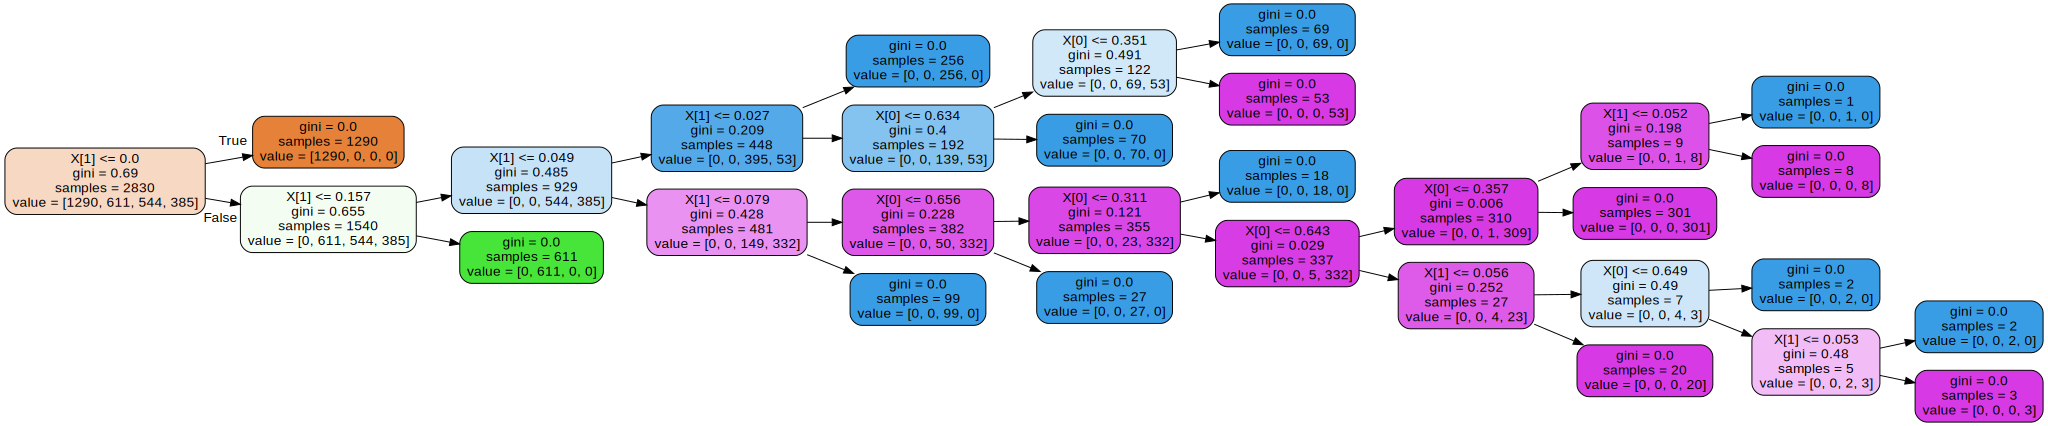

In [27]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree,
                           out_file=None, 
                           filled=True,
                           rounded=True,  
                           rotate=True)  

display(graphviz.Source(dot_data))

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix

yhat_train = dtree.predict(X_train)

print("Training data:")
print(classification_report(y_train, yhat_train))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830



In [29]:
yhat_test  = dtree.predict(X_test)

print("Test data:")
print(classification_report(y_test, yhat_test))

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



Training data:


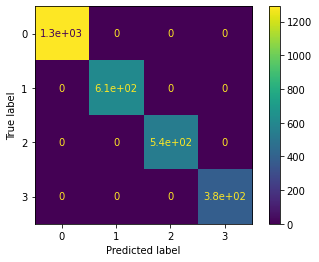

In [30]:
print("Training data:")
plot_confusion_matrix(dtree, X_train, y_train)

Test data:


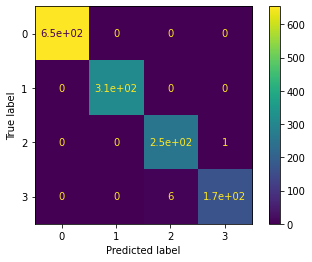

In [31]:
print("Test data:")
plot_confusion_matrix(dtree, X_test, y_test)

In [32]:
dtree = DecisionTreeClassifier(min_samples_split=4)
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



In [ ]:
#np.isin(X_train, X_test)
X_train.shape


(2830, 2)

In [ ]:
X_test.shape

(1394, 2)

## Criterion

In [ ]:
dtree = DecisionTreeClassifier(criterion ='gini' )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



In [ ]:
dtree = DecisionTreeClassifier(criterion ='entropy' )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



## splitter

In [ ]:
dtree = DecisionTreeClassifier(splitter ='random' )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.97      0.99      0.98       255
           3       0.99      0.96      0.97       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       0.99      0.99      0.99      1394



## min_samples_split

In [ ]:
dtree = DecisionTreeClassifier(min_samples_split= 2 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



In [ ]:
dtree = DecisionTreeClassifier(min_samples_split= 3 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      1.00      0.99       255
           3       0.99      0.97      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       1.00      0.99      0.99      1394



## min_samples_leaf

In [ ]:
dtree = DecisionTreeClassifier(min_samples_leaf= 1 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.97      1.00      0.98       255
           3       0.99      0.96      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       0.99      0.99      0.99      1394



In [ ]:
dtree = DecisionTreeClassifier(min_samples_leaf= 2 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       1.00      1.00      1.00       544
           3       1.00      1.00      1.00       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.97      1.00      0.98       255
           3       0.99      0.95      0.97       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       0.99      0.99      0.99      1394



## max_depth

In [ ]:
dtree = DecisionTreeClassifier(max_depth=4 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       0.90      0.91      0.91       544
           3       0.87      0.86      0.87       385

    accuracy                           0.96      2830
   macro avg       0.94      0.94      0.94      2830
weighted avg       0.96      0.96      0.96      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.90      0.89      0.90       255
           3       0.85      0.85      0.85       174

    accuracy                           0.96      1394
   macro avg       0.94      0.94      0.94      1394
weighted avg       0.96      0.96      0.96      1394



In [ ]:
dtree = DecisionTreeClassifier(max_depth=8 )
dtree.fit(X_train, y_train)

yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       0.99      1.00      1.00       544
           3       1.00      0.99      0.99       385

    accuracy                           1.00      2830
   macro avg       1.00      1.00      1.00      2830
weighted avg       1.00      1.00      1.00      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.97      0.98      0.98       255
           3       0.98      0.96      0.97       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       0.99      0.99      0.99      1394



## Hyperparameter Overview:

# Final Decision Tree & Evaluation

[Text(133.92000000000002, 190.26, 'X[1] <= 0.0\ngini = 0.69\nsamples = 2830\nvalue = [1290, 611, 544, 385]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 1290\nvalue = [1290, 0, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[1] <= 0.157\ngini = 0.655\nsamples = 1540\nvalue = [0, 611, 544, 385]'),
 Text(133.92000000000002, 81.53999999999999, 'X[1] <= 0.049\ngini = 0.485\nsamples = 929\nvalue = [0, 0, 544, 385]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.209\nsamples = 448\nvalue = [0, 0, 395, 53]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.428\nsamples = 481\nvalue = [0, 0, 149, 332]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 611\nvalue = [0, 611, 0, 0]')]

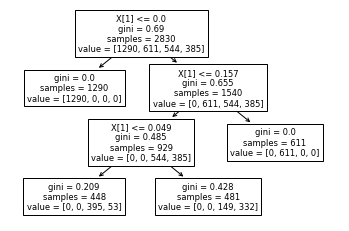

In [44]:
from sklearn import tree
dtree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=4)
#dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train, y_train)
tree.plot_tree(dtree)

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import  cross_val_score

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [40]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## confusion_matrix

Training data:


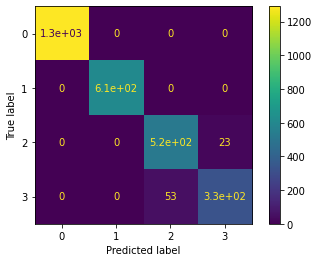

In [41]:
print("Training data:")
plot_confusion_matrix(dtree, X_train, y_train)

Test data:


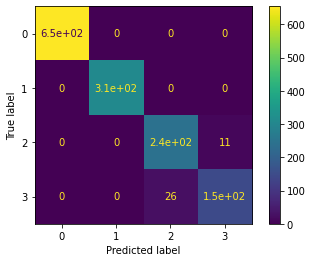

In [42]:
print("Test data:")
plot_confusion_matrix(dtree, X_test, y_test)

## Classification_Report

In [43]:
yhat_train = dtree.predict(X_train)
print("Training data:")
print(classification_report(y_train, yhat_train))

yhat_test  = dtree.predict(X_test)
print("Test data:")
print(classification_report(y_test, yhat_test))

Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       0.91      0.96      0.93       544
           3       0.94      0.86      0.90       385

    accuracy                           0.97      2830
   macro avg       0.96      0.96      0.96      2830
weighted avg       0.97      0.97      0.97      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.90      0.96      0.93       255
           3       0.93      0.85      0.89       174

    accuracy                           0.97      1394
   macro avg       0.96      0.95      0.95      1394
weighted avg       0.97      0.97      0.97      1394



# Visualization

[Text(167.4, 195.696, 'X[1] <= 0.0\ngini = 0.69\nsamples = 2830\nvalue = [1290, 611, 544, 385]'),
 Text(125.55000000000001, 152.208, 'gini = 0.0\nsamples = 1290\nvalue = [1290, 0, 0, 0]'),
 Text(209.25, 152.208, 'X[1] <= 0.157\ngini = 0.655\nsamples = 1540\nvalue = [0, 611, 544, 385]'),
 Text(167.4, 108.72, 'X[1] <= 0.049\ngini = 0.485\nsamples = 929\nvalue = [0, 0, 544, 385]'),
 Text(83.7, 65.232, 'X[1] <= 0.027\ngini = 0.209\nsamples = 448\nvalue = [0, 0, 395, 53]'),
 Text(41.85, 21.744, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(125.55000000000001, 21.744, 'gini = 0.4\nsamples = 192\nvalue = [0, 0, 139, 53]'),
 Text(251.10000000000002, 65.232, 'X[1] <= 0.079\ngini = 0.428\nsamples = 481\nvalue = [0, 0, 149, 332]'),
 Text(209.25, 21.744, 'gini = 0.228\nsamples = 382\nvalue = [0, 0, 50, 332]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 99\nvalue = [0, 0, 99, 0]'),
 Text(251.10000000000002, 108.72, 'gini = 0.0\nsamples = 611\nvalue = [0, 611, 0, 0]')]

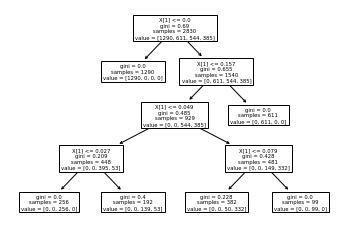

In [ ]:
from sklearn import tree
dtree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)
dtree.fit(X_train, y_train)
tree.plot_tree(dtree)

In [ ]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 

In [ ]:
dt_c_n.describe()

,New_Time,DC_POWER,IRRADIATION,SourceKeyCode,PerfCode
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,0.500000,0.159357,0.284916,0.500000,0.993608
std,0.295311,0.291152,0.355023,0.295347,1.085808
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.250000,0.000000
50%,0.500000,0.006809,0.033671,0.500000,1.000000
75%,0.750000,0.079089,0.622537,0.750000,2.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000


range range(0, 4)
pairidx 0
pair [0, 1]
X= [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
y= [0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning:

Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



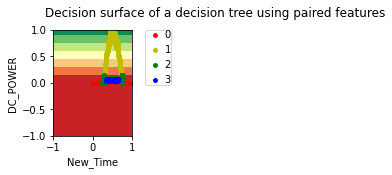

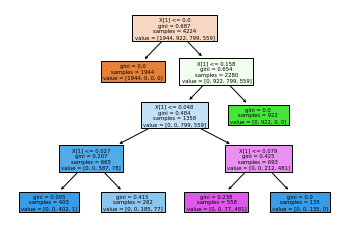

In [ ]:
#Using normalized dataset because meshgrid is giving memory issues for DC_Power column
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 4
print("range",range(n_classes))
plot_colors = "rygb"
plot_step = 0.02

# Load data
#iris = load_iris()
# [0, 2], [0, 3],[0, 4]
for pairidx, pair in enumerate([[0, 1]]):
  print("pairidx",pairidx)
  print("pair",pair)
  
  X =  dt_c_n.iloc[:, [0,1]].values 
  y =  dt_c_n.iloc[:, -1].values
  print("X=",X)
  print("y=",y)
  clf = DecisionTreeClassifier().fit(X, y)

  ax=plt.subplot(2,4, pairidx + 1)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)
  plt.xlabel(dt_c_n.columns[0])
  plt.ylabel(dt_c_n.columns[1])

    # Plot the training points
  for i, color in zip(range(n_classes), plot_colors):
   # print("i,color",i,color)
    idx = np.where(y == i)
  #  print("idx",idx)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,label=i, 
                 s=15)
  
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='left', borderpad=0, handletextpad=0,bbox_to_anchor=(1.1, 1.05))
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier(max_depth=4).fit(X,y)
plot_tree(clf, filled=True)
plt.show()

'Normal': '0','Above Average':'1',\
                                        'Below Average':'2',\
                                        'Maintenance Required':'3'}

# Decision tree path:

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-cp37-none-any.whl size=60009 sha256=4a6f7441c36d04be82d375c2d31fbe2d213a31e59c428c7e306b6c24dad1f11f
  Stored in directory: /root/.cache/pip/wheels/b9/4b/20/0bde3e04ace9178327ffabf575f9bbc4abb1d0c4f8c355306a
Successfully built dtreeviz


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


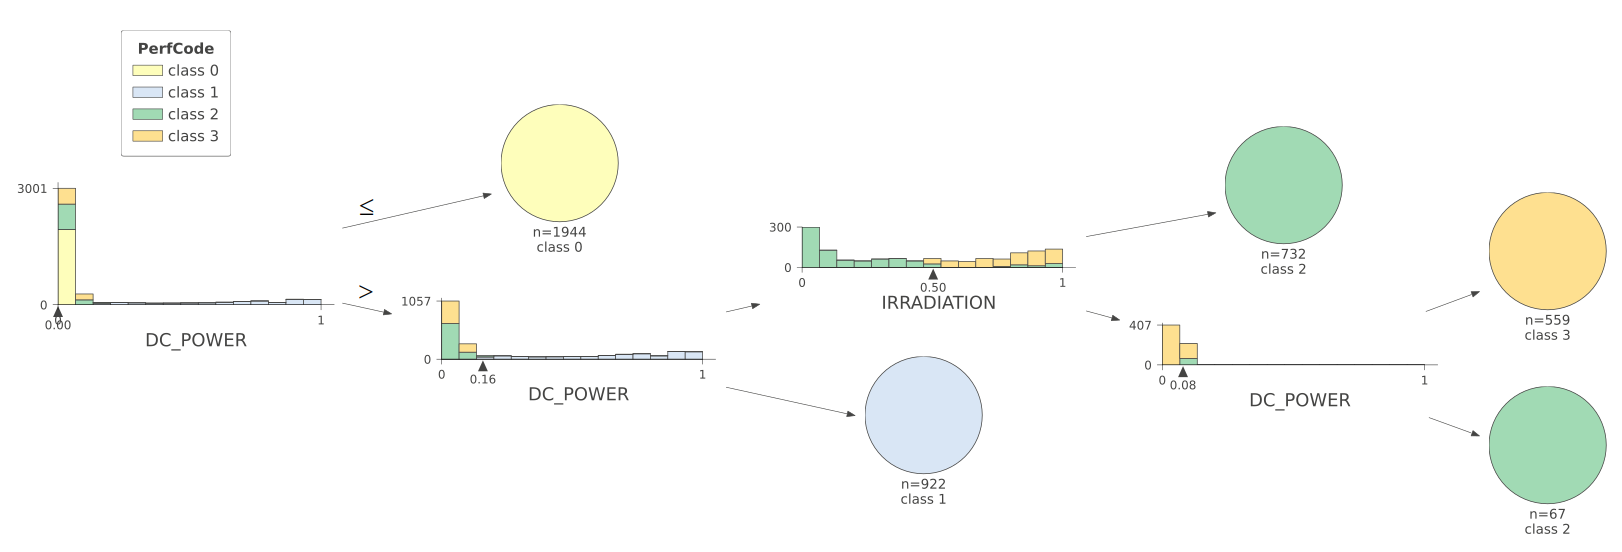

In [ ]:
from dtreeviz.trees import dtreeviz

features = ['New_Time', 'DC_POWER', 'IRRADIATION']
dtree = DecisionTreeClassifier()
X = dt_c_n.iloc[:, :-2].values
y = dt_c_n.iloc[:, -1].values
dtree.fit(X, y)

viz = dtreeviz(tree_model=dtree,
               x_data=X,
               y_data=y,
               target_name='PerfCode',
               feature_names=np.array(features),
               orientation ='LR',
               scale=2.0)              
display(viz)

In [ ]:
from dtreeviz.trees import explain_prediction_path
features = ['New_Time', 'DC_POWER', 'IRRADIATION']
X = dt_c_n.iloc[:, :-2].values
y = dt_c_n.iloc[:, -1].values
print(explain_prediction_path(tree_model=dtree,
                              x=X[40],
                              feature_names=np.array(features),
                              explanation_type="plain_english"))

0.0 <= DC_POWER 



### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
data_sizes, training_scores, validation_scores = \
  learning_curve(DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4), X_train, \
                 y_train, cv=10, scoring='accuracy', \
                 train_sizes=np.linspace(0.01, 1.0, 51))

In [ ]:
training_mean = training_scores.mean(axis=1) 
training_standard_deviation = training_scores.std(axis=1) 

In [ ]:
validation_mean = validation_scores.mean(axis=1) 
validation_standard_deviation = validation_scores.std(axis=1)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

# Accuracy

Perform a comparison of our Decision Tree QuAM vs kNN QuAM: provide a comparison table of
accuracy for your various DT QuAMS and your kNN QuAMs. This will be a tool for comparison for you
as a technician, but it will also serve as a communication tool to summarize to stakeholders what
you tried, what worked best, and why.

For the classification, using three features- DC power,IRRADIATION and TIME - the accuracy of both KNN and DT were comparable.Below are the results.

**KNN**
On training data:
                      precision    recall  f1-score   support

       Above Average       1.00      1.00      1.00       731
       Below Average       1.00      1.00      1.00       653
Maintenance Required       1.00      1.00      1.00       450
              Normal       1.00      1.00      1.00      1545

            accuracy                           1.00      3379
           macro avg       1.00      1.00      1.00      3379
        weighted avg       1.00      1.00      1.00      3379

On test data:
                      precision    recall  f1-score   support

       Above Average       1.00      1.00      1.00       191
       Below Average       0.99      0.84      0.91       146
Maintenance Required       0.93      1.00      0.96       109
              Normal       0.96      1.00      0.98       399

            accuracy                           0.97       845
           macro avg       0.97      0.96      0.96       845
        weighted avg       0.97      0.97      0.97       845

**DTREE ACCURACY**
Training data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       0.90      0.91      0.91       544
           3       0.87      0.86      0.87       385

    accuracy                           0.96      2830
   macro avg       0.94      0.94      0.94      2830
weighted avg       0.96      0.96      0.96      2830

Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.90      0.89      0.90       255
           3       0.85      0.85      0.85       174

    accuracy                           0.96      1394
   macro avg       0.94      0.94      0.94      1394
weighted avg       0.96      0.96      0.96      1394


```
# This is formatted as code
```



# Business Evaluation

One of the key objectives of this course is to learn how to implement ML algorithms to tackle
business problems and objectives. Please provide us with a complete scenario of how the results of
your decision tree classifier might be used.
Note: you’ve previously considered some of these questions, the intent with reconsidering them is
to iterate on our problem after obtaining results from our QuAM.

1. ** What might be the motivation for a decision tree classifier?**

Both KNN and DTree yielded comparable accuracy with the test data.The solar panel problem is classifying numeric features and KNN and Dtree are yielding good accuracy.However,we realize Knn is a memory intensive algorithm and disances need to calculated for every training data.For Dtree,once the model is built, it requires choosing the tree path for the test data for prediction.It could be faster.
Dtree's in general are prone to bias and overfitting.More testing may be needed to conclude on the accuracy.

2. **What is the “action” that should be taken given the results of this prediction?**

There are some inverters which are identified as - requiring maintenence - THe DC power generated is not comparable at peak times-The technical and maintenance services team needs to investigate the invertors in the plant.

3.** Who is the best immediate person(s) to make use of the results of your prediction?**

Buisiness team that plans power supply in the grid.

4**. What is the potential payoff of this prediction for an organization? (e.g. costs or efficiency).**

Helps the company to plan the power output and quatinty of new customers to enroll in the time period.

5**. Do your QuAMs results change your problem? If so, how and why? If not, please explain.**

We defined a broader problem to classify invertors and predict power.After building the QUAM- we are able to indentify more specifically the features that will help in better classification and prediction.

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier(max_depth=3, max_leaf_nodes=4)
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=4, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
yhat_train_rforest = rforest.predict(X_train)

In [ ]:
print("Random forest on training data:")
print(classification_report(y_train, yhat_train_rforest))
yhat_test_rforest  = rforest.predict(X_test)
print("Random forest on test data:")
print(classification_report(y_test, yhat_test_rforest))

Random forest on training data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1290
           1       1.00      1.00      1.00       611
           2       0.90      0.89      0.90       544
           3       0.87      0.86      0.87       385

    accuracy                           0.96      2830
   macro avg       0.94      0.94      0.94      2830
weighted avg       0.96      0.96      0.96      2830

Random forest on test data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.90      0.87      0.88       255
           3       0.84      0.86      0.85       174

    accuracy                           0.96      1394
   macro avg       0.93      0.93      0.93      1394
weighted avg       0.96      0.96      0.96      1394



Random forest on test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       654
           1       1.00      1.00      1.00       311
           2       0.98      0.99      0.99       255
           3       0.98      0.98      0.98       174

    accuracy                           0.99      1394
   macro avg       0.99      0.99      0.99      1394
weighted avg       0.99      0.99      0.99      1394

